## Supervised Random Forest Training on CIC-IDS Features

This notebook trains a supervised Random Forest classifier using the labeled CIC-IDS dataset. It covers the full pipeline from data loading and preprocessing to model training, evaluation, and export. The goal is to establish a strong, labeled baseline for attack detection that addresses the sensitivity issues encountered with the previous unsupervised model. Evaluation is performed on a hold-out test set using standard classification metrics and confusion matrix visualization.


## 1. Import and Setup

This section imports all the necessary libraries for supervised model training, including `RandomForestClassifier`, data splitting, evaluation metrics, visualization, and file operations. It also defines key file paths for data input and model output, and ensures the output directory exists.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [2]:
data_path = '../../data/cleaned_cic.csv'  # Full CIC-IDS dataset with label column
model_output = '../../models/4_supervised_rf/model.joblib'
scaler_output = '../../models/4_supervised_rf/scaler.joblib'
os.makedirs('../../models/4_supervised_rf', exist_ok=True)

## 2. Load and Prepare Dataset

The cleaned CIC-IDS dataset is loaded into memory. The feature matrix `X` is separated from the label column `y` (which indicates whether a flow is benign or an attack). The label column is cast to integer format for compatibility with scikit-learn.


In [3]:
print("Loading dataset...")
df = pd.read_csv(data_path)
X = df.drop(columns=['attack'])
y = df['attack'].astype(int)

Loading dataset...


## 3. Split Data for Training and Testing and Model Training

The dataset is split into training and test subsets using `train_test_split`, with 20% of the data held out for testing. Stratified sampling ensures the class distribution is preserved across both sets.

A Random Forest classifier is trained on the training subset using 100 estimators and parallel processing. After training, the model is evaluated on the test set using the classification report and confusion matrix. The matrix is visualized using a heatmap to highlight model performance across both classes.


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
print("Training Random Forest classifier...")
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1)
rf.fit(X_train, y_train)

Training Random Forest classifier...


Evaluating on test set...
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00    454265
      Attack       1.00      1.00      1.00    111311

    accuracy                           1.00    565576
   macro avg       1.00      1.00      1.00    565576
weighted avg       1.00      1.00      1.00    565576



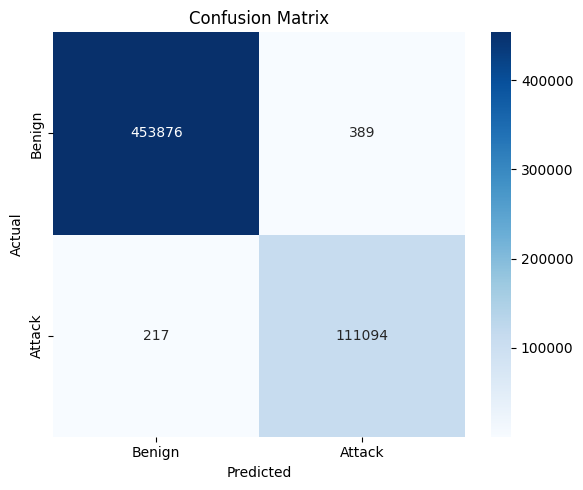

In [6]:
print("Evaluating on test set...")
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Benign', 'Attack']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Attack'], yticklabels=['Benign', 'Attack'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## 4. Save Trained Model
The final trained model is saved to disk using `joblib` for future inference or deployment. The path for storage is defined in the configuration section.


In [8]:
print("Saving model...")
joblib.dump(rf, model_output)
print(f"Model saved to {model_output}")

Saving model...
Model saved to ../../models/4_supervised_rf/model.joblib
